# 3.4.3 泊松回归———航班数据分析

# 1. 业务理解

In [1]:
# 略，见教材内容。本文件为教材《数据分析理论与实践：基于经典算法及Python编程实现》（朝乐门主编，机械工业出版社，2022年）的配套代码。

# 2.数据读入

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [3]:
df_erosion = pd.read_csv("o-ring-erosion-only.csv"
                         ,names=['Number of O-rings at risk on a given flight',
                                'Number experiencing thermal distress ', 
                                'Launch temperature (degrees F)',
                                'Leak-check pressure (psi)',
                                'Temporal order of flight'])

In [4]:
pd.read_csv?

# 3. 数据理解

In [5]:
df_erosion.head()

,Number of O-rings at risk on a given flight,Number experiencing thermal distress,Launch temperature (degrees F),Leak-check pressure (psi),Temporal order of flight
0,6,0,66,50,1
1,6,1,70,50,2
2,6,0,69,50,3
3,6,0,68,50,4
4,6,0,67,50,5


In [6]:
df_erosion.describe()

,Number of O-rings at risk on a given flight,Number experiencing thermal distress,Launch temperature (degrees F),Leak-check pressure (psi),Temporal order of flight
count,23.0,23.000000,23.000000,23.000000,23.00000
mean,6.0,0.391304,69.565217,152.173913,12.00000
std,0.0,0.656376,7.057080,68.221332,6.78233
min,6.0,0.000000,53.000000,50.000000,1.00000
25%,6.0,0.000000,67.000000,75.000000,6.50000
50%,6.0,0.000000,70.000000,200.000000,12.00000
75%,6.0,1.000000,75.000000,200.000000,17.50000
max,6.0,2.000000,81.000000,200.000000,23.00000


In [7]:
df_erosion.shape

(23, 5)

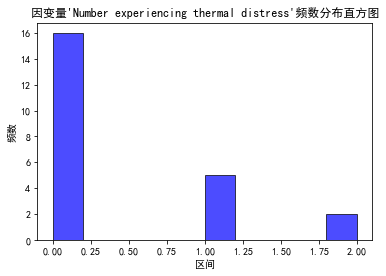

In [8]:
# 绘制直方图 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号

plt.hist(df_erosion['Number experiencing thermal distress '] #出现热损伤的O型环数量
         , bins=10 
         ,facecolor="blue"
         , edgecolor="black"
         , alpha=0.7)

# 显示横轴标签
plt.xlabel("区间")
# 显示纵轴标签
plt.ylabel("频数")
# 显示图标题
plt.title("因变量'Number experiencing thermal distress'频数分布直方图")
plt.show()

In [9]:
print(np.mean(df_erosion['Number experiencing thermal distress ']))
print(np.var(df_erosion['Number experiencing thermal distress ']))

0.391304347826087
0.41209829867674863


# 4.数据准备

In [10]:
df_erosion.rename(columns={'Number of O-rings at risk on a given flight':'num_rings',
                           'Launch temperature (degrees F)':'temperature',
                           'Leak-check pressure (psi)':'pressure',
                           'Temporal order of flight':'order',
                           'Number experiencing thermal distress ':'num_distress'}
                  ,inplace=True )

order = ['num_rings', 'temperature', 'pressure', 'order', 'num_distress']
df_erosion = df_erosion[order]


# 5.模型训练

In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

glm=smf.glm('num_distress~num_rings + temperature + pressure + order'
            , df_erosion
            , family=sm.families.Poisson() 
           )

results = glm.fit()
print(results.summary())


df_erosion['predict_result'] = results.predict(df_erosion)
df_erosion['predict_result'] =df_erosion['predict_result'].apply(lambda x:round(x, 3))
df_erosion.head()

                 Generalized Linear Model Regression Results                  
Dep. Variable:           num_distress   No. Observations:                   23
Model:                            GLM   Df Residuals:                       19
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15.317
Date:                Sun, 30 Oct 2022   Deviance:                       15.407
Time:                        13:19:54   Pearson chi2:                     23.4
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0984      0.090      1.094      

,num_rings,temperature,pressure,order,num_distress,predict_result
0,6,66,50,1,0,0.161
1,6,70,50,2,1,0.114
2,6,69,50,3,0,0.126
3,6,68,50,4,0,0.140
4,6,67,50,5,0,0.154


In [12]:
help(smf.glm)

Help on method from_formula in module statsmodels.base.model:

from_formula(formula, data, subset=None, drop_cols=None, *args, **kwargs) method of builtins.type instance
    Create a Model from a formula and dataframe.
    
    Parameters
    ----------
    formula : str or generic Formula object
        The formula specifying the model.
    data : array_like
        The data for the model. See Notes.
    subset : array_like
        An array-like object of booleans, integers, or index values that
        indicate the subset of df to use in the model. Assumes df is a
        `pandas.DataFrame`.
    drop_cols : array_like
        Columns to drop from the design matrix.  Cannot be used to
        drop terms involving categoricals.
    *args
        Additional positional argument that are passed to the model.
    **kwargs
        These are passed to the model with one exception. The
        ``eval_env`` keyword is passed to patsy. It can be either a
        :class:`patsy:patsy.EvalEnvironm

In [13]:
# help(sm.families)  

In [14]:
sm.families.Poisson?

# 6.模型评估

In [15]:
from sklearn.metrics import  mean_squared_error
import numpy as np
print("RMSE:", np.sqrt(mean_squared_error(df_erosion.predict_result, df_erosion.num_distress)))

RMSE: 0.4895481057323038


In [16]:
# 本文件为教材《数据分析理论与实践：基于经典算法及Python编程实现》（朝乐门主编，机械工业出版社，2022年）的配套代码。